['Reasoning', '1', '0.2442635085122132', '0.33811475409836067', '0.19119351100811124', '0.0', '0.2347839081996131']
['Reasoning', '2', '0.299349240780911', '0.39807692307692305', '0.2398609501738123', '0.05361696623489129', '0.23554921032929618']
['Reasoning', '4', '0.3292061179898033', '0.44313725490196076', '0.26187717265353416', '0.07586700398299588', '0.23397346610804937']
['Reasoning', '8', '0.3557483731019523', '0.47307692307692306', '0.2850521436848204', '0.09291254655542534', '0.23342424969691905']
['Reasoning', '16', '0.38294898672257166', '0.4823943661971831', '0.3174971031286211', '0.10271402019050523', '0.2324842714813931']
['Reasoning', '32', '0.42097802976612336', '0.541970802919708', '0.34414831981460026', '0.11137952543679473', '0.2313136985626038']
['Reasoning', '64', '0.4357700496806246', '0.5622710622710623', '0.35573580533024335', '0.10862239260160089', '0.2310313974657308']
['StepReasoning', '1', '0.26497005988023953', '0.37420718816067655', '0.20509849362688296', 

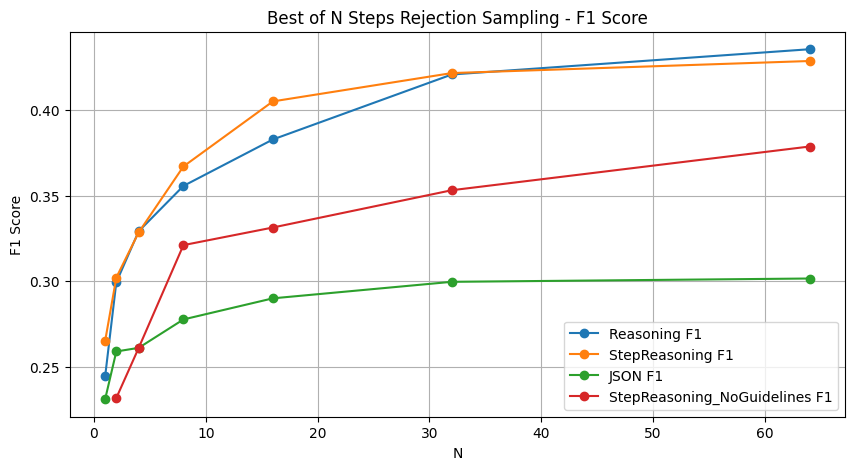

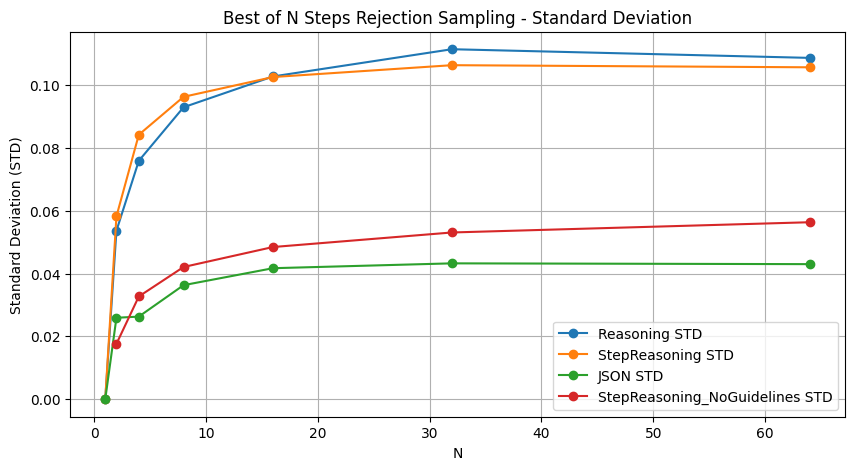

In [1]:
import csv

import matplotlib.pyplot as plt
import os


#os.chdir("../../..")

# Load data from the CSV file
csv_path = "/leonardo/home/userexternal/mzubilla/DocIE/multimuc/data/multimuc_v1.0/corrected/en/rejectionSampling/scores.csv"
data = {"Reasoning": {"n": [], "F1": [], "STD": [], "Mean":[]}, "StepReasoning": {"n": [], "F1": [], "STD": [], "Mean":[]}, "JSON": {"n": [], "F1": [], "STD": [], "Mean":[]}, "StepReasoning_NoGuidelines": {"n": [], "F1": [], "STD": []}}

with open(csv_path, "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        print(row)
        type_, n, f1, precision, recall, std, mean = row
        n = int(n)
        f1 = float(f1)
        std = float(std)
        mean = float(mean)
        if type_ in data:
            data[type_]["n"].append(n)
            data[type_]["F1"].append(f1)
            data[type_]["STD"].append(std)
            data[type_]["Mean"].append(mean)  # Assuming the mean is in the 7th column

csv_path_zaharra= "/leonardo/home/userexternal/mzubilla/DocIE/multimuc/data/multimuc_v1.0/corrected/en/rejectionSampling/scores_zaharra.csv"
with open(csv_path_zaharra, "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        print(row)
        type_, n, f1, precision, recall, std = row
        n = int(n)
        f1 = float(f1)
        std = float(std)
        if type_ in data:
            data[type_]["n"].append(n)
            data[type_]["F1"].append(f1)
            data[type_]["STD"].append(std)

# Plot F1 scores
plt.figure(figsize=(10, 5))
for type_ in data:
    plt.plot(data[type_]["n"], data[type_]["F1"], marker='o', label=f"{type_} F1")
plt.xlabel("N")
plt.ylabel("F1 Score")
plt.title("Best of N Steps Rejection Sampling - F1 Score")
plt.legend()
plt.grid(True)
plt.show()

# Plot standard deviations
plt.figure(figsize=(10, 5))
for type_ in data:
    plt.plot(data[type_]["n"], data[type_]["STD"], marker='o', label=f"{type_} STD")
plt.xlabel("N")
plt.ylabel("Standard Deviation (STD)")
plt.title("Best of N Steps Rejection Sampling - Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()

{'n': [1, 2, 4, 8, 16, 32, 64], 'F1_max': [0.2442635085122132, 0.299349240780911, 0.3292061179898033, 0.3557483731019523, 0.38294898672257166, 0.42097802976612336, 0.4357700496806246], 'F1_mean': [0.2347839081996131, 0.23554921032929618, 0.23397346610804937, 0.23342424969691905, 0.2324842714813931, 0.2313136985626038, 0.2310313974657308], 'STD': [0.0, 0.05361696623489129, 0.07586700398299588, 0.09291254655542534, 0.10271402019050523, 0.11137952543679473, 0.10862239260160089]}


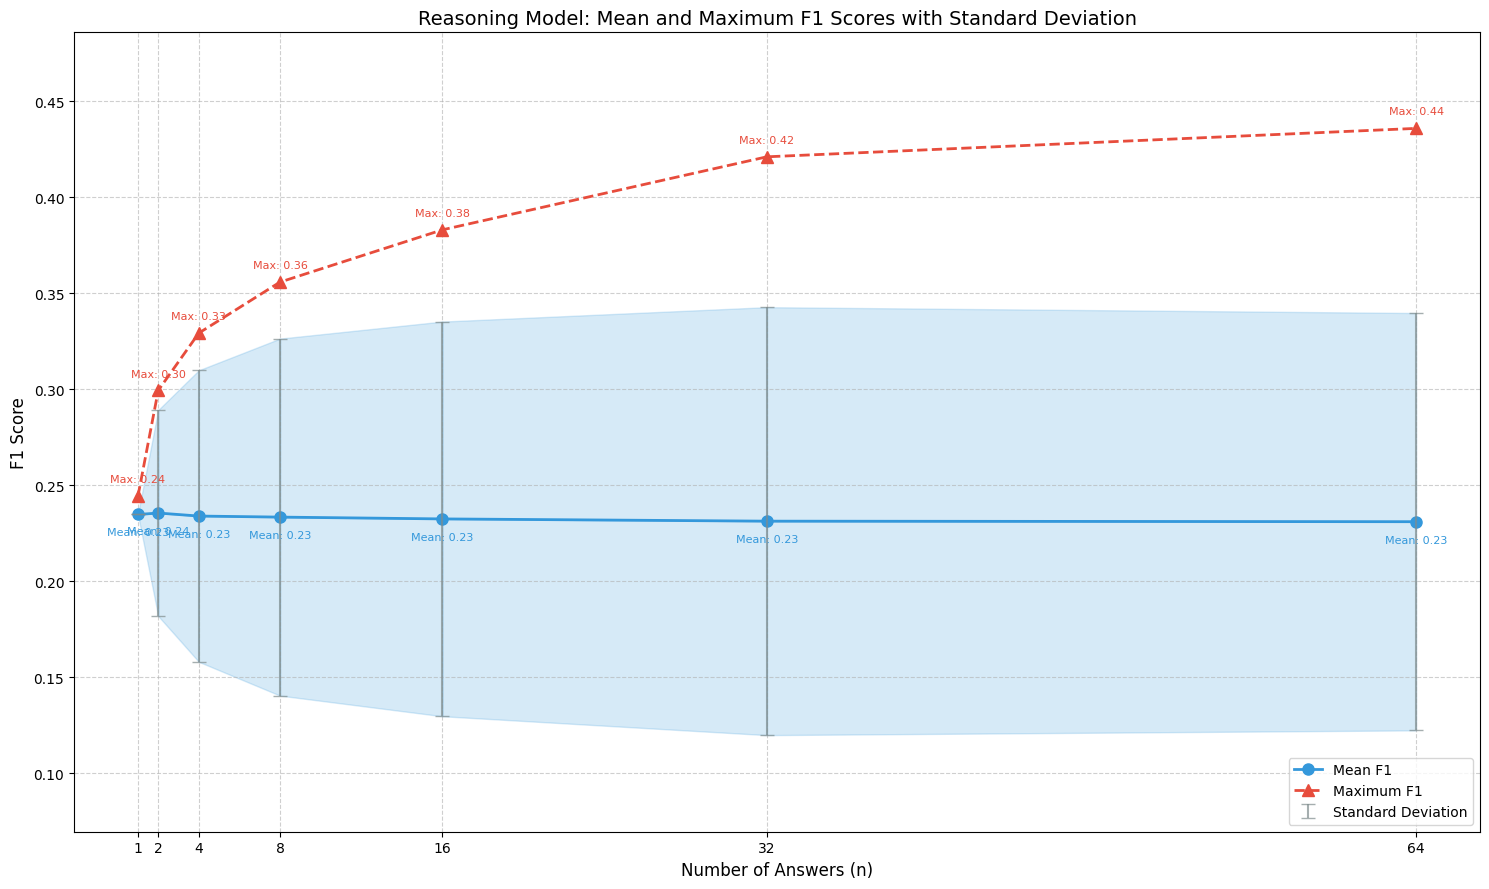

In [2]:


# Sample data for Reasoning model
reasoning_data = {
    "n": data["Reasoning"]["n"],  # Number of answers
    "F1_max": data["Reasoning"]["F1"],  # Maximum F1 scores
    "F1_mean": data["Reasoning"]["Mean"],  # Mean F1 scores
    "STD": data["Reasoning"]["STD"]      # Standard deviation
}

print(reasoning_data)
# Set up the figure
plt.figure(figsize=(15, 9))

# Plot mean F1 scores
plt.plot(
    reasoning_data["n"],
    reasoning_data["F1_mean"],
    marker='o',
    linestyle='-',
    color='#3498db',
    linewidth=2,
    markersize=8,
    label='Mean F1'
)

# Plot maximum F1 scores
plt.plot(
    reasoning_data["n"],
    reasoning_data["F1_max"],
    marker='^',
    linestyle='--',
    color='#e74c3c',
    linewidth=2,
    markersize=8,
    label='Maximum F1'
)

# Add error bars for standard deviation (from mean)
plt.errorbar(
    reasoning_data["n"],
    reasoning_data["F1_mean"],
    yerr=reasoning_data["STD"],
    fmt='none',
    ecolor='#7f8c8d',
    capsize=5,
    capthick=1,
    alpha=0.7,
    label='Standard Deviation'
)

# Shade the area between mean and mean+std
for i in range(len(reasoning_data["n"])-1):
    x_vals = [reasoning_data["n"][i], reasoning_data["n"][i+1]]
    y_mean = [reasoning_data["F1_mean"][i], reasoning_data["F1_mean"][i+1]]
    y_mean_plus_std = [reasoning_data["F1_mean"][i] + reasoning_data["STD"][i],
                       reasoning_data["F1_mean"][i+1] + reasoning_data["STD"][i+1]]

    plt.fill_between(x_vals, y_mean, y_mean_plus_std,
                    alpha=0.2, color='#3498db')

    y_mean_minus_std = [reasoning_data["F1_mean"][i] - reasoning_data["STD"][i],
                        reasoning_data["F1_mean"][i+1] - reasoning_data["STD"][i+1]]

    plt.fill_between(x_vals, y_mean, y_mean_minus_std,
                    alpha=0.2, color='#3498db')

# Add labels and title
plt.xlabel('Number of Answers (n)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('Reasoning Model: Mean and Maximum F1 Scores with Standard Deviation', fontsize=14)

# Set x-ticks to integers
plt.xticks(reasoning_data["n"])

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Set y-axis limits with padding
min_value = min(min(reasoning_data["F1_mean"]) - max(reasoning_data["STD"]),
                min(reasoning_data["F1_max"])) - 0.05
max_value = max(max(reasoning_data["F1_mean"]) + max(reasoning_data["STD"]),
                max(reasoning_data["F1_max"])) + 0.05

plt.ylim(max(0, min_value), min(1.0, max_value))

# Add legend
plt.legend(loc='lower right', fontsize=10)

# Add annotations for maximum values
for i, (n, f1_max) in enumerate(zip(reasoning_data["n"], reasoning_data["F1_max"])):
    plt.annotate(
        f'Max: {f1_max:.2f}',
        (n, f1_max),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=8,
        color='#e74c3c'
    )

# Add annotations for mean values
for i, (n, f1_mean) in enumerate(zip(reasoning_data["n"], reasoning_data["F1_mean"])):
    plt.annotate(
        f'Mean: {f1_mean:.2f}',
        (n, f1_mean),
        textcoords="offset points",
        xytext=(0, -15),
        ha='center',
        fontsize=8,
        color='#3498db'
    )

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

Reasoning data: {'n': [1, 2, 4, 8, 16, 32, 64], 'F1_max': [0.2442635085122132, 0.299349240780911, 0.3292061179898033, 0.3557483731019523, 0.38294898672257166, 0.42097802976612336, 0.4357700496806246], 'F1_mean': [0.2347839081996131, 0.23554921032929618, 0.23397346610804937, 0.23342424969691905, 0.2324842714813931, 0.2313136985626038, 0.2310313974657308], 'STD': [0.0, 0.05361696623489129, 0.07586700398299588, 0.09291254655542534, 0.10271402019050523, 0.11137952543679473, 0.10862239260160089]}
JSON data: {'n': [1, 2, 4, 8, 16, 32, 64], 'F1_max': [0.2309124767225326, 0.2588597842835131, 0.2609771181199753, 0.27760641579272055, 0.2899628252788104, 0.29963008631319354, 0.30156815440289503], 'F1_mean': [0.23043187074798632, 0.23072024535171837, 0.22901270785790095, 0.22774971677134334, 0.22668088008989504, 0.22565504813759213, 0.22480528045699516], 'STD': [0.0, 0.02592096884991157, 0.026290333367278863, 0.036293005939920665, 0.04169427962010155, 0.043239074186107555, 0.04298671176547229]}


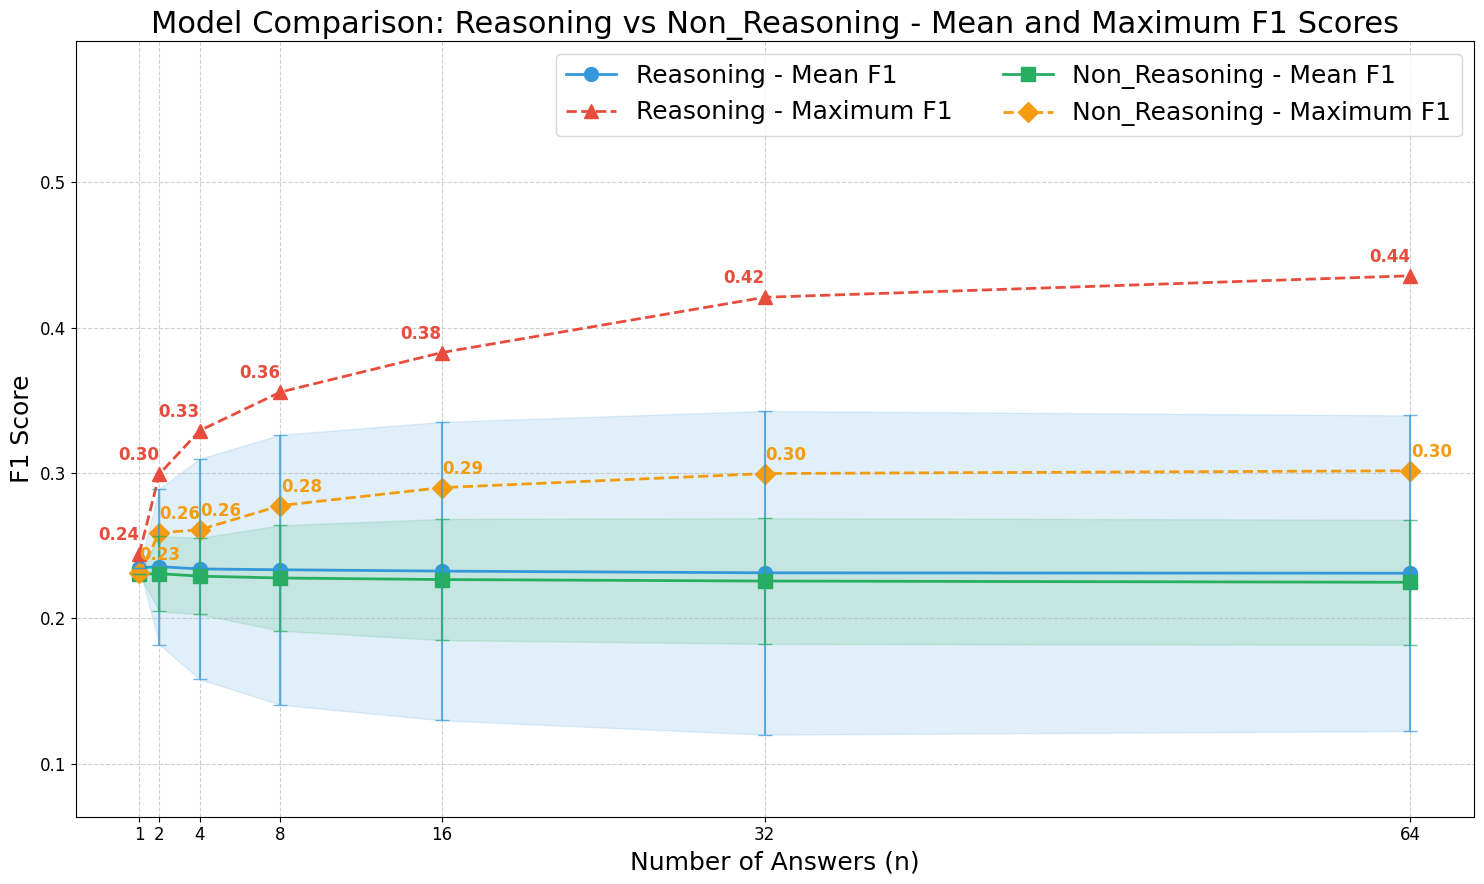

In [12]:
# No sample data needed, as reasoning_data and json_data are already defined

plt.rcParams.update({'font.size': 12})

# The rest of the code remains unchanged except for annotation of mean values (removed)
reasoning_data = {
    "n": data["Reasoning"]["n"],
    "F1_max": data["Reasoning"]["F1"],
    "F1_mean": data["Reasoning"]["Mean"],
    "STD": data["Reasoning"]["STD"]
}

json_data = {
    "n": data["JSON"]["n"],
    "F1_max": data["JSON"]["F1"],
    "F1_mean": data["JSON"]["Mean"],
    "STD": data["JSON"]["STD"]
}

print("Reasoning data:", reasoning_data)
print("JSON data:", json_data)

# Set up the figure
plt.figure(figsize=(15, 9))

# Colors for the two models
reasoning_color = '#3498db'  # Blue
json_color = '#27ae60'       # Green
reasoning_max_color = '#e74c3c'  # Red
json_max_color = '#f39c12'       # Orange

# Plot Reasoning model
# Mean F1 scores
plt.plot(
    reasoning_data["n"],
    reasoning_data["F1_mean"],
    marker='o',
    linestyle='-',
    color=reasoning_color,
    linewidth=2,
    markersize=10,
    label='Reasoning - Mean F1'
)

# Maximum F1 scores
plt.plot(
    reasoning_data["n"],
    reasoning_data["F1_max"],
    marker='^',
    linestyle='--',
    color=reasoning_max_color,
    linewidth=2,
    markersize=10,
    label='Reasoning - Maximum F1'
)

# Plot JSON model
# Mean F1 scores
plt.plot(
    json_data["n"],
    json_data["F1_mean"],
    marker='s',  # Square marker
    linestyle='-',
    color=json_color,
    linewidth=2,
    markersize=10,
    label='Non_Reasoning - Mean F1'
)

# Maximum F1 scores
plt.plot(
    json_data["n"],
    json_data["F1_max"],
    marker='D',  # Diamond marker
    linestyle='--',
    color=json_max_color,
    linewidth=2,
    markersize=10,
    label='Non_Reasoning - Maximum F1'
)

# Add error bars for both models
# Reasoning model error bars
plt.errorbar(
    reasoning_data["n"],
    reasoning_data["F1_mean"],
    yerr=reasoning_data["STD"],
    fmt='none',
    ecolor=reasoning_color,
    capsize=5,
    capthick=1,
    alpha=0.7
)

# JSON model error bars
plt.errorbar(
    json_data["n"],
    json_data["F1_mean"],
    yerr=json_data["STD"],
    fmt='none',
    ecolor=json_color,
    capsize=5,
    capthick=1,
    alpha=0.7
)

# Shade the area between mean and mean±std for Reasoning model
for i in range(len(reasoning_data["n"])-1):
    x_vals = [reasoning_data["n"][i], reasoning_data["n"][i+1]]
    y_mean = [reasoning_data["F1_mean"][i], reasoning_data["F1_mean"][i+1]]
    y_mean_plus_std = [reasoning_data["F1_mean"][i] + reasoning_data["STD"][i],
                       reasoning_data["F1_mean"][i+1] + reasoning_data["STD"][i+1]]
    y_mean_minus_std = [reasoning_data["F1_mean"][i] - reasoning_data["STD"][i],
                        reasoning_data["F1_mean"][i+1] - reasoning_data["STD"][i+1]]

    plt.fill_between(x_vals, y_mean_minus_std, y_mean_plus_std,
                    alpha=0.15, color=reasoning_color)

# Shade the area between mean and mean±std for JSON model
for i in range(len(json_data["n"])-1):
    x_vals = [json_data["n"][i], json_data["n"][i+1]]
    y_mean = [json_data["F1_mean"][i], json_data["F1_mean"][i+1]]
    y_mean_plus_std = [json_data["F1_mean"][i] + json_data["STD"][i],
                       json_data["F1_mean"][i+1] + json_data["STD"][i+1]]
    y_mean_minus_std = [json_data["F1_mean"][i] - json_data["STD"][i],
                        json_data["F1_mean"][i+1] - json_data["STD"][i+1]]

    plt.fill_between(x_vals, y_mean_minus_std, y_mean_plus_std,
                    alpha=0.15, color=json_color)

# Add labels and title
plt.xlabel('Number of Answers (n)', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.title('Model Comparison: Reasoning vs Non_Reasoning - Mean and Maximum F1 Scores', fontsize=22)

# Set x-ticks to integers (combine both model's n values and sort)
all_n_values = sorted(list(set(reasoning_data["n"] + json_data["n"])))
plt.xticks(all_n_values)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Set y-axis limits with padding
all_values = (reasoning_data["F1_mean"] + reasoning_data["F1_max"] + 
              json_data["F1_mean"] + json_data["F1_max"])
all_stds = reasoning_data["STD"] + json_data["STD"]

min_value = min(all_values) - max(all_stds) - 0.05
max_value = max(all_values) + max(all_stds) + 0.05

plt.ylim(max(0, min_value), min(1.0, max_value))

# Add legend with better positioning
plt.legend(loc='best', fontsize=18, ncol=2)

# Add annotations for maximum values (with slight offset to avoid overlap)
for i, (n, f1_max) in enumerate(zip(reasoning_data["n"], reasoning_data["F1_max"])):
    plt.annotate(
        f'{f1_max:.2f}',
        (n, f1_max),
        textcoords="offset points",
        xytext=(-15, 10),
        ha='center',
        fontsize=12,
        color=reasoning_max_color,
        weight='bold'
    )

for i, (n, f1_max) in enumerate(zip(json_data["n"], json_data["F1_max"])):
    plt.annotate(
        f'{f1_max:.2f}',
        (n, f1_max),
        textcoords="offset points",
        xytext=(15, 10),
        ha='center',
        fontsize=12,
        color=json_max_color,
        weight='bold'
    )

# Improve layout
plt.tight_layout()
plt.savefig("model_comparison_plot.png", format="png", dpi=300)
# Show plot
plt.show()

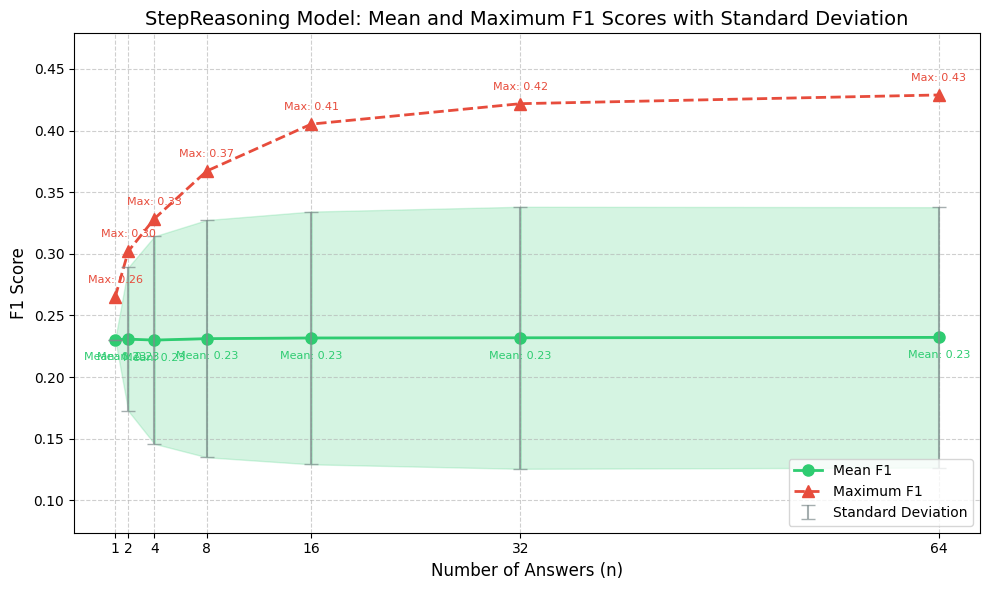

In [3]:
#Do the same but with Reasoning steps
# Extract data for StepReasoning model
step_reasoning_data = {
    "n": data["StepReasoning"]["n"],  # Number of answers
    "F1_max": data["StepReasoning"]["F1"],  # Maximum F1 scores
    "F1_mean": data["StepReasoning"]["Mean"],  # Mean F1 scores
    "STD": data["StepReasoning"]["STD"]      # Standard deviation
}

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot mean F1 scores
plt.plot(
    step_reasoning_data["n"],
    step_reasoning_data["F1_mean"],
    marker='o',
    linestyle='-',
    color='#2ecc71',  # Green color for StepReasoning model
    linewidth=2,
    markersize=8,
    label='Mean F1'
)

# Plot maximum F1 scores
plt.plot(
    step_reasoning_data["n"],
    step_reasoning_data["F1_max"],
    marker='^',
    linestyle='--',
    color='#e74c3c',  # Red for maximum
    linewidth=2,
    markersize=8,
    label='Maximum F1'
)

# Add error bars for standard deviation (from mean)
plt.errorbar(
    step_reasoning_data["n"],
    step_reasoning_data["F1_mean"],
    yerr=step_reasoning_data["STD"],
    fmt='none',
    ecolor='#7f8c8d',
    capsize=5,
    capthick=1,
    alpha=0.7,
    label='Standard Deviation'
)

# Shade the area between mean and mean+std
for i in range(len(step_reasoning_data["n"])-1):
    x_vals = [step_reasoning_data["n"][i], step_reasoning_data["n"][i+1]]
    y_mean = [step_reasoning_data["F1_mean"][i], step_reasoning_data["F1_mean"][i+1]]
    y_mean_plus_std = [step_reasoning_data["F1_mean"][i] + step_reasoning_data["STD"][i],
                       step_reasoning_data["F1_mean"][i+1] + step_reasoning_data["STD"][i+1]]

    plt.fill_between(x_vals, y_mean, y_mean_plus_std,
                    alpha=0.2, color='#2ecc71')

    y_mean_minus_std = [step_reasoning_data["F1_mean"][i] - step_reasoning_data["STD"][i],
                        step_reasoning_data["F1_mean"][i+1] - step_reasoning_data["STD"][i+1]]

    plt.fill_between(x_vals, y_mean, y_mean_minus_std,
                    alpha=0.2, color='#2ecc71')

# Add labels and title
plt.xlabel('Number of Answers (n)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('StepReasoning Model: Mean and Maximum F1 Scores with Standard Deviation', fontsize=14)

# Set x-ticks to integers
plt.xticks(step_reasoning_data["n"])

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Set y-axis limits with padding
min_value = min(min(step_reasoning_data["F1_mean"]) - max(step_reasoning_data["STD"]),
                min(step_reasoning_data["F1_max"])) - 0.05
max_value = max(max(step_reasoning_data["F1_mean"]) + max(step_reasoning_data["STD"]),
                max(step_reasoning_data["F1_max"])) + 0.05

plt.ylim(max(0, min_value), min(1.0, max_value))

# Add legend
plt.legend(loc='lower right', fontsize=10)

# Add annotations for maximum values
for i, (n, f1_max) in enumerate(zip(step_reasoning_data["n"], step_reasoning_data["F1_max"])):
    plt.annotate(
        f'Max: {f1_max:.2f}',
        (n, f1_max),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=8,
        color='#e74c3c'
    )

# Add annotations for mean values
for i, (n, f1_mean) in enumerate(zip(step_reasoning_data["n"], step_reasoning_data["F1_mean"])):
    plt.annotate(
        f'Mean: {f1_mean:.2f}',
        (n, f1_mean),
        textcoords="offset points",
        xytext=(0, -15),
        ha='center',
        fontsize=8,
        color='#2ecc71'
    )

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

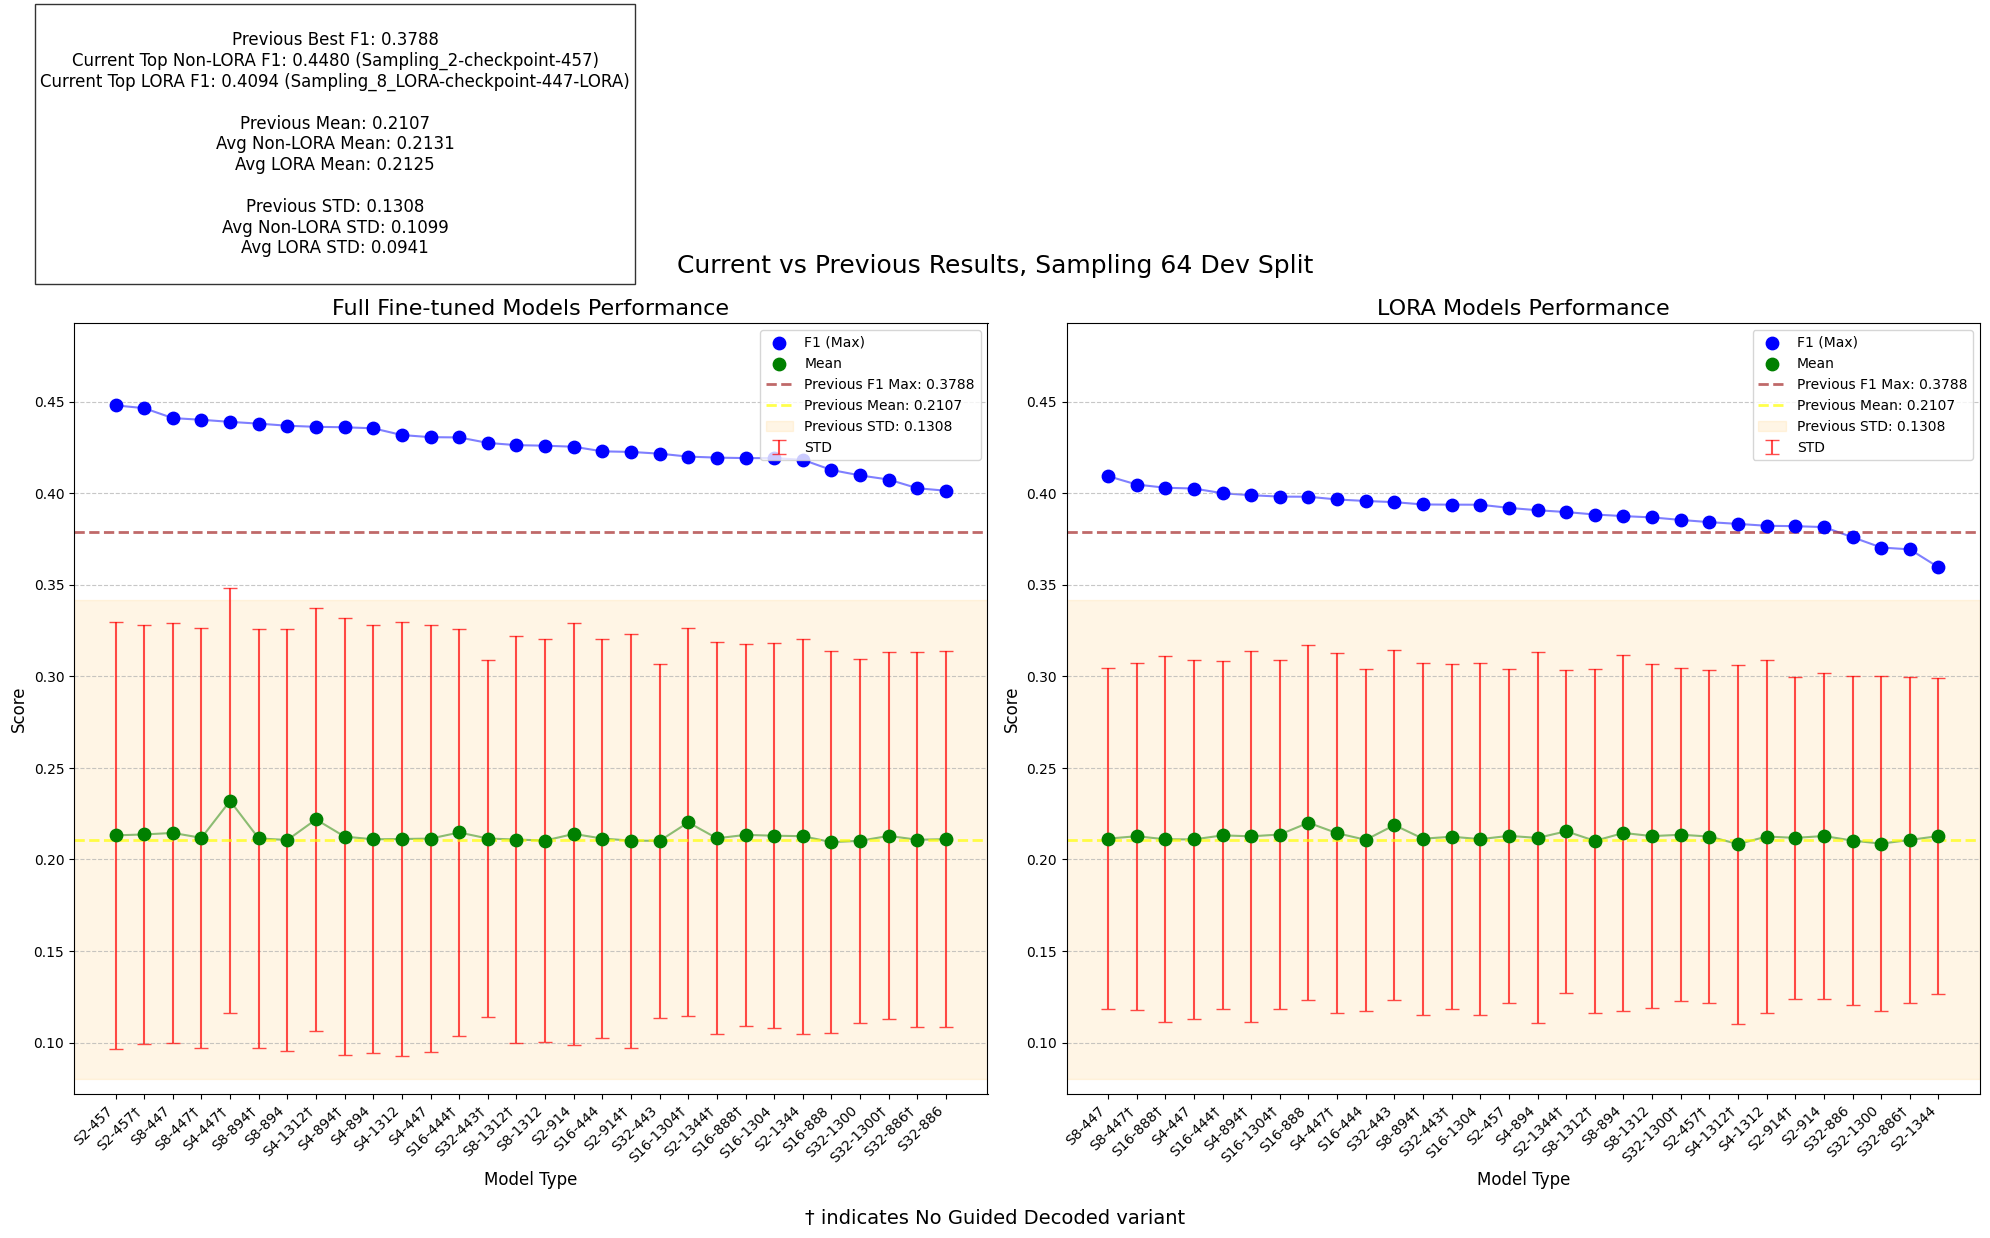

In [1]:

from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/dev/scores_iter1.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.37882653061224486
previous_std = 0.13084442883022368
previous_mean = 0.21073892522867638

# Sort by F1 score within each group
df['is_lora'] = df['Type'].apply(is_lora)
lora_df = df[df['is_lora']].sort_values('F1', ascending=False)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax1.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax1.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax1.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
            fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax1.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax1.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax1.set_xlabel('Model Type', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax1.set_xticks(x_non_lora)

# Set y-axis limits to be consistent across both plots
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            lora_df['Mean'].min() - lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), lora_df['F1'].max(), previous_max_f1) * 1.1

ax1.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax1.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot LORA data
x_lora = np.arange(len(lora_df))

# Plot F1 and Mean as points instead of bars
ax2.scatter(x_lora, lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax2.scatter(x_lora, lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax2.errorbar(x_lora, lora_df['Mean'], yerr=lora_df['STD'],
            fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax2.plot(x_lora, lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax2.plot(x_lora, lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for LORA plot
ax2.set_xlabel('Model Type', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('LORA Models Performance', fontsize=16)
ax2.set_xticks(x_lora)

# Use same y-axis limits as the first plot for consistency
ax2.set_ylim(y_min, y_max)

# Create shorter labels for better readability
lora_labels = []
for name in lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)_LORA-checkpoint-(\d+)-LORA-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)_LORA-checkpoint-(\d+)-LORA', r'S\1-\2', name)
    lora_labels.append(label)

ax2.set_xticklabels(lora_labels, rotation=45, ha='right', fontsize=10)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
for ax in [ax1, ax2]:
    # Add horizontal line for previous max F1
    ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
              label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

    # Add horizontal line for previous mean
    ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
              label='Previous Mean: {:.4f}'.format(previous_mean))

    # Add std range as a semi-transparent rectangle
    std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                              ax.get_xlim()[1] - ax.get_xlim()[0],
                              2 * previous_std,
                              linewidth=1,
                              edgecolor='orange',
                              facecolor='orange',
                              alpha=0.1,
                              label='Previous STD: {:.4f}'.format(previous_std))
    ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legends with custom order
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Dev Split', fontsize=18)

# Optionally, add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Current Top LORA F1: {lora_df['F1'].max():.4f} ({lora_df.iloc[0]['Type']})

Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Avg LORA Mean: {lora_df['Mean'].mean():.4f}

Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
Avg LORA STD: {lora_df['STD'].mean():.4f}
"""
fig.text(0.17, 0.96, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

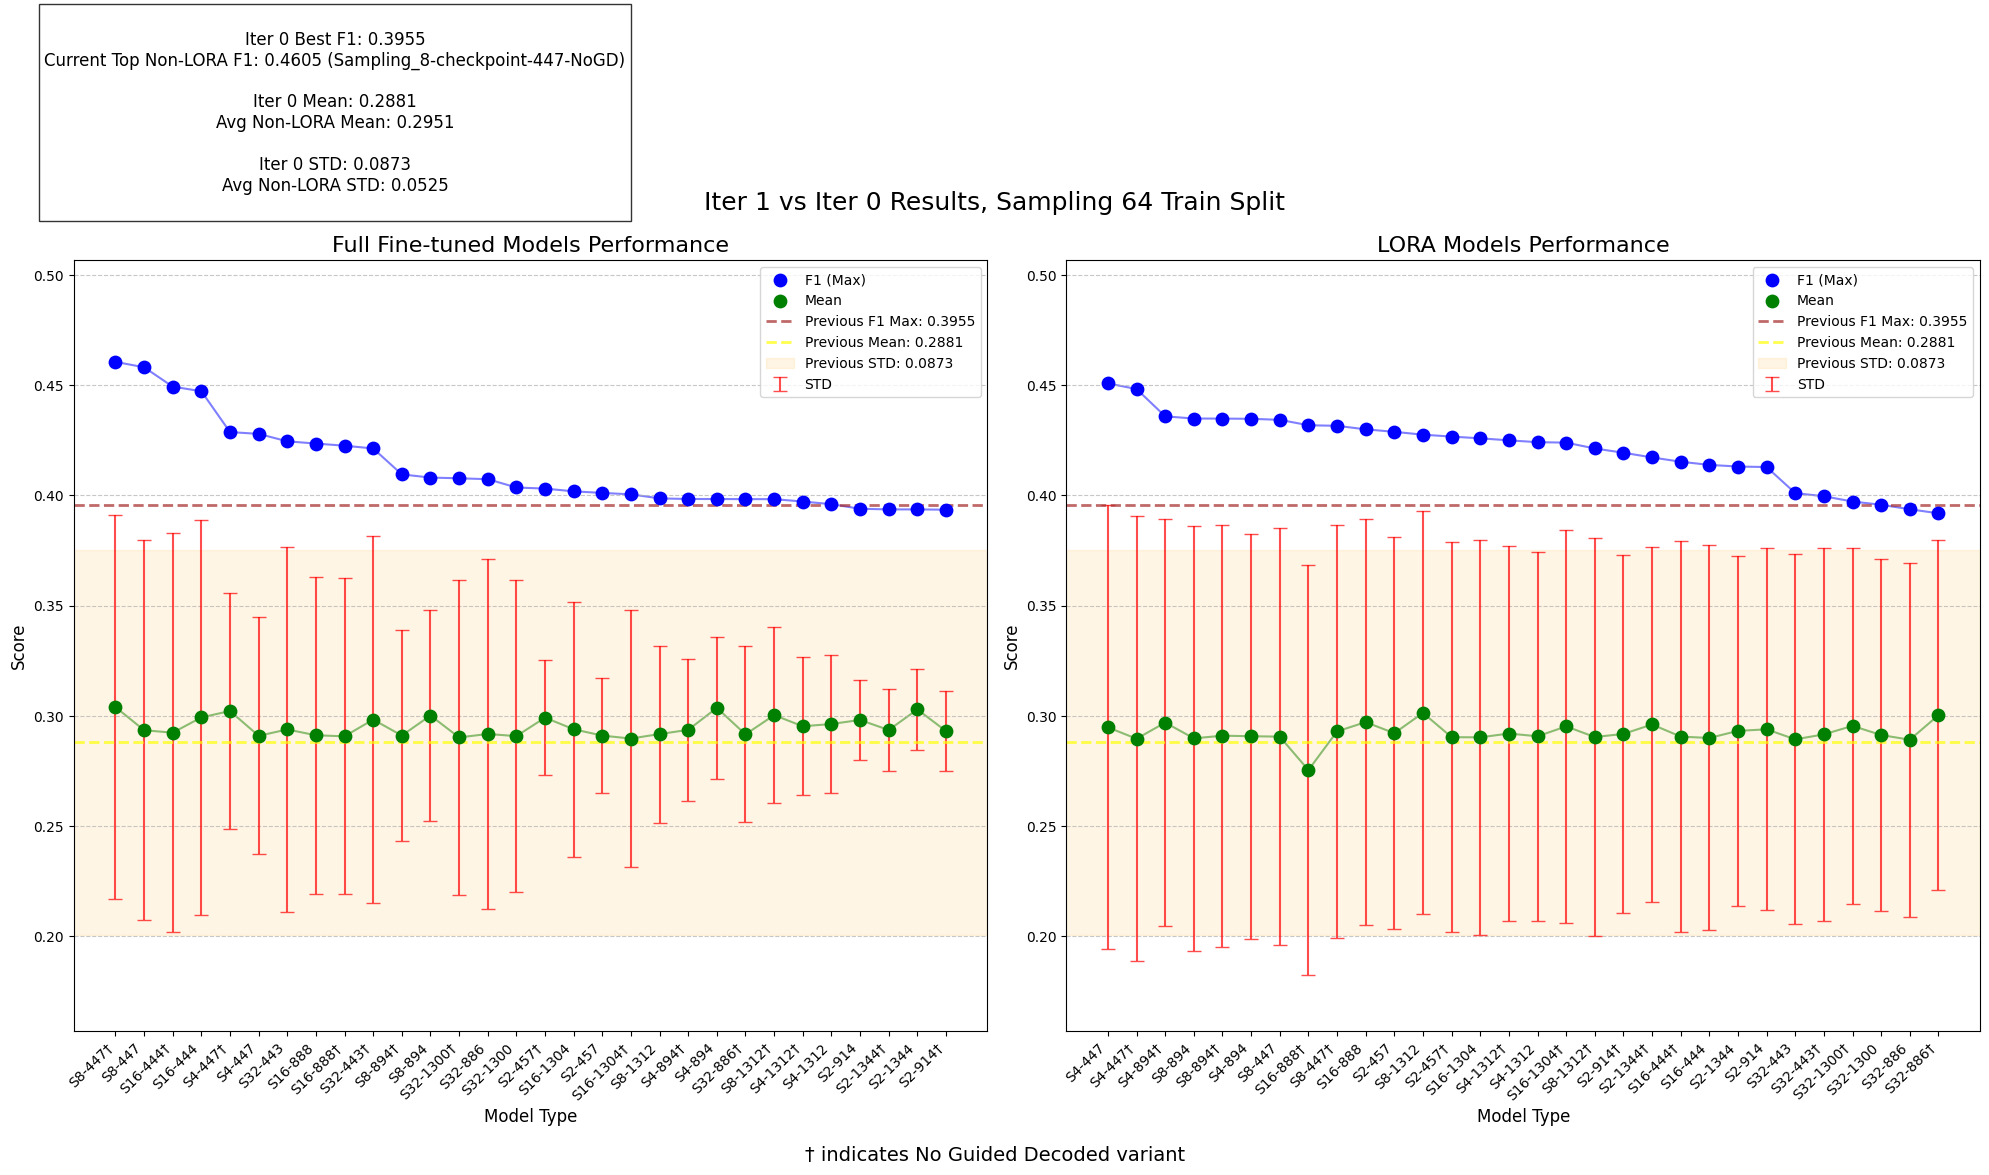

In [1]:

from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
os.chdir("../../..")


# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/train/scores_iter1.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.3954556441866086
previous_std = 0.0873015145728405
previous_mean = 0.2880604592258623

# Sort by F1 score within each group
df['is_lora'] = df['Type'].apply(is_lora)
lora_df = df[df['is_lora']].sort_values('F1', ascending=False)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax1.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax1.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax1.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
            fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax1.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax1.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax1.set_xlabel('Model Type', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax1.set_xticks(x_non_lora)

# Set y-axis limits to be consistent across both plots
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            lora_df['Mean'].min() - lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), lora_df['F1'].max(), previous_max_f1) * 1.1

ax1.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax1.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot LORA data
x_lora = np.arange(len(lora_df))

# Plot F1 and Mean as points instead of bars
ax2.scatter(x_lora, lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax2.scatter(x_lora, lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax2.errorbar(x_lora, lora_df['Mean'], yerr=lora_df['STD'],
            fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax2.plot(x_lora, lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax2.plot(x_lora, lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for LORA plot
ax2.set_xlabel('Model Type', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('LORA Models Performance', fontsize=16)
ax2.set_xticks(x_lora)

# Use same y-axis limits as the first plot for consistency
ax2.set_ylim(y_min, y_max)

# Create shorter labels for better readability
lora_labels = []
for name in lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)_LORA-checkpoint-(\d+)-LORA-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)_LORA-checkpoint-(\d+)-LORA', r'S\1-\2', name)
    lora_labels.append(label)

ax2.set_xticklabels(lora_labels, rotation=45, ha='right', fontsize=10)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
for ax in [ax1, ax2]:
    # Add horizontal line for previous max F1
    ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
              label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

    # Add horizontal line for previous mean
    ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
              label='Previous Mean: {:.4f}'.format(previous_mean))

    # Add std range as a semi-transparent rectangle
    std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                              ax.get_xlim()[1] - ax.get_xlim()[0],
                              2 * previous_std,
                              linewidth=1,
                              edgecolor='orange',
                              facecolor='orange',
                              alpha=0.1,
                              label='Previous STD: {:.4f}'.format(previous_std))
    ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legends with custom order
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Iter 1 vs Iter 0 Results, Sampling 64 Train Split', fontsize=18)

# Optionally, add summary statistics
'''
stats_text = f"""
Iter 0 F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Current Top LORA F1: {lora_df['F1'].max():.4f} ({lora_df.iloc[0]['Type']})

Iter 0 Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Avg LORA Mean: {lora_df['Mean'].mean():.4f}

Iter 0 STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
Avg LORA STD: {lora_df['STD'].mean():.4f}
"""
'''
stats_text = f"""
Iter 0 Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})

Iter 0 Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}

Iter 0 STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.17, 0.96, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

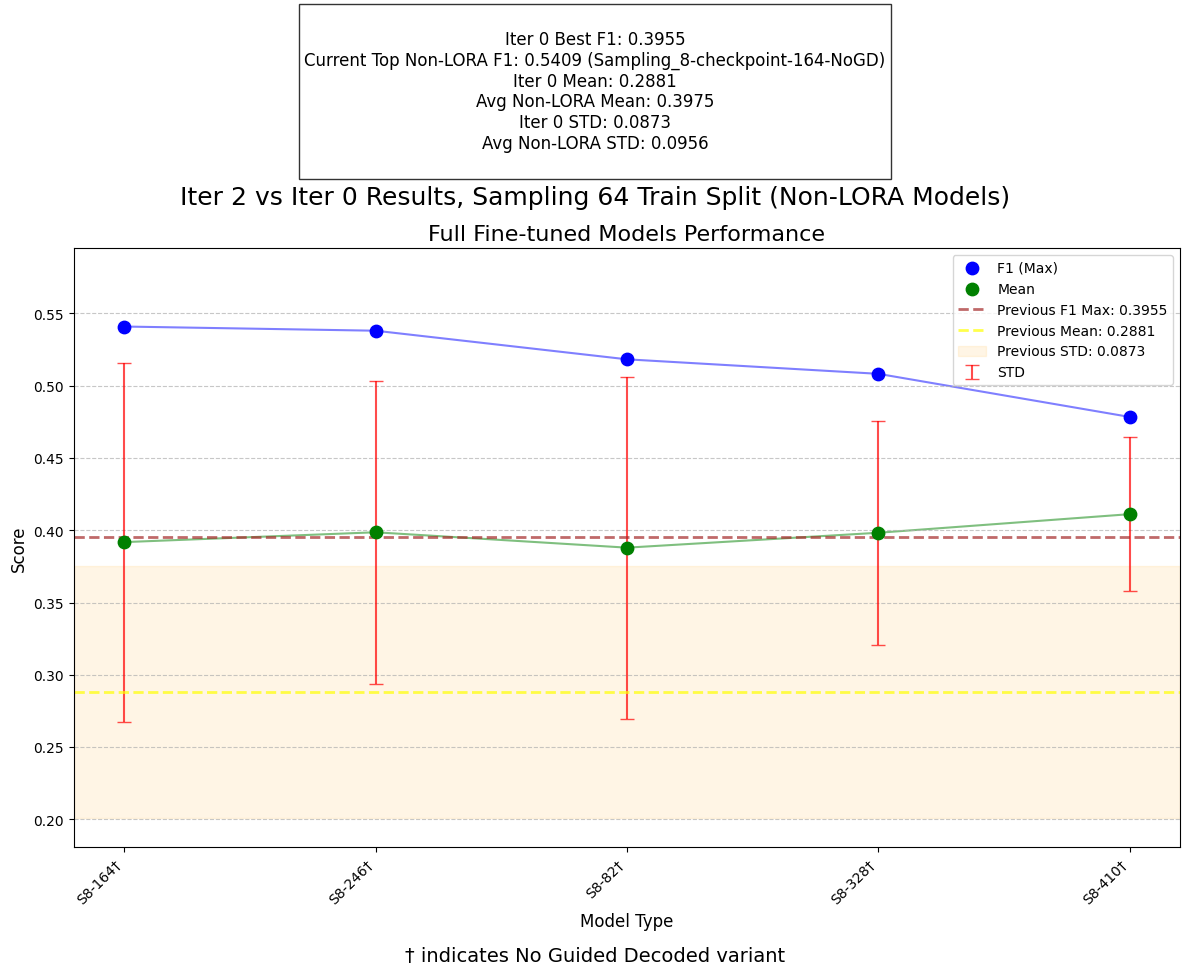

In [2]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/train/scores_iter2.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.3954556441866086
previous_std = 0.0873015145728405
previous_mean = 0.2880604592258623

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Iter 2 vs Iter 0 Results, Sampling 64 Train Split', fontsize=18)

# Add summary statistics
stats_text = f"""
Iter 0 Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Iter 0 Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Iter 0 STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

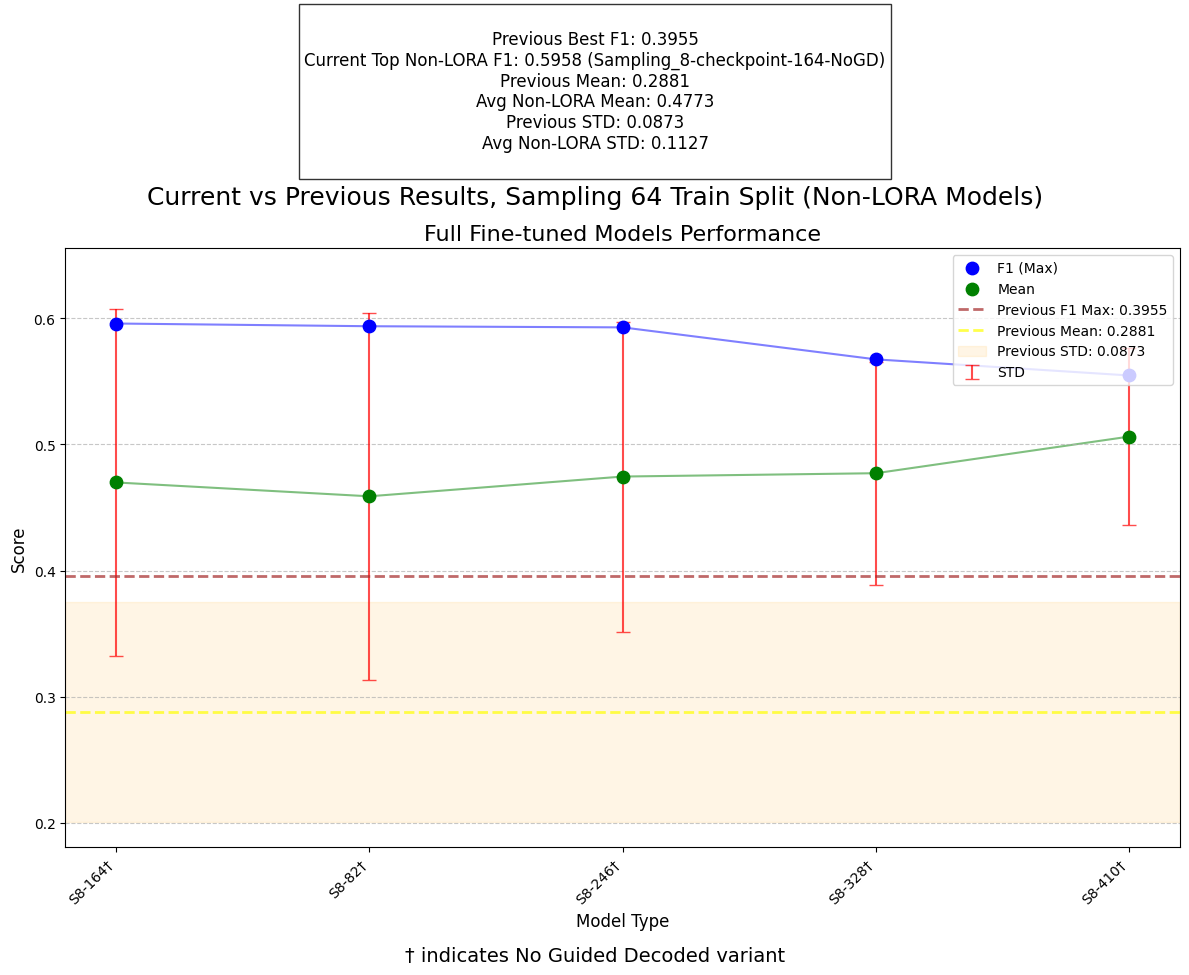

In [1]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/train/scores_iter3.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.3954556441866086
previous_std = 0.0873015145728405
previous_mean = 0.2880604592258623

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Train Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

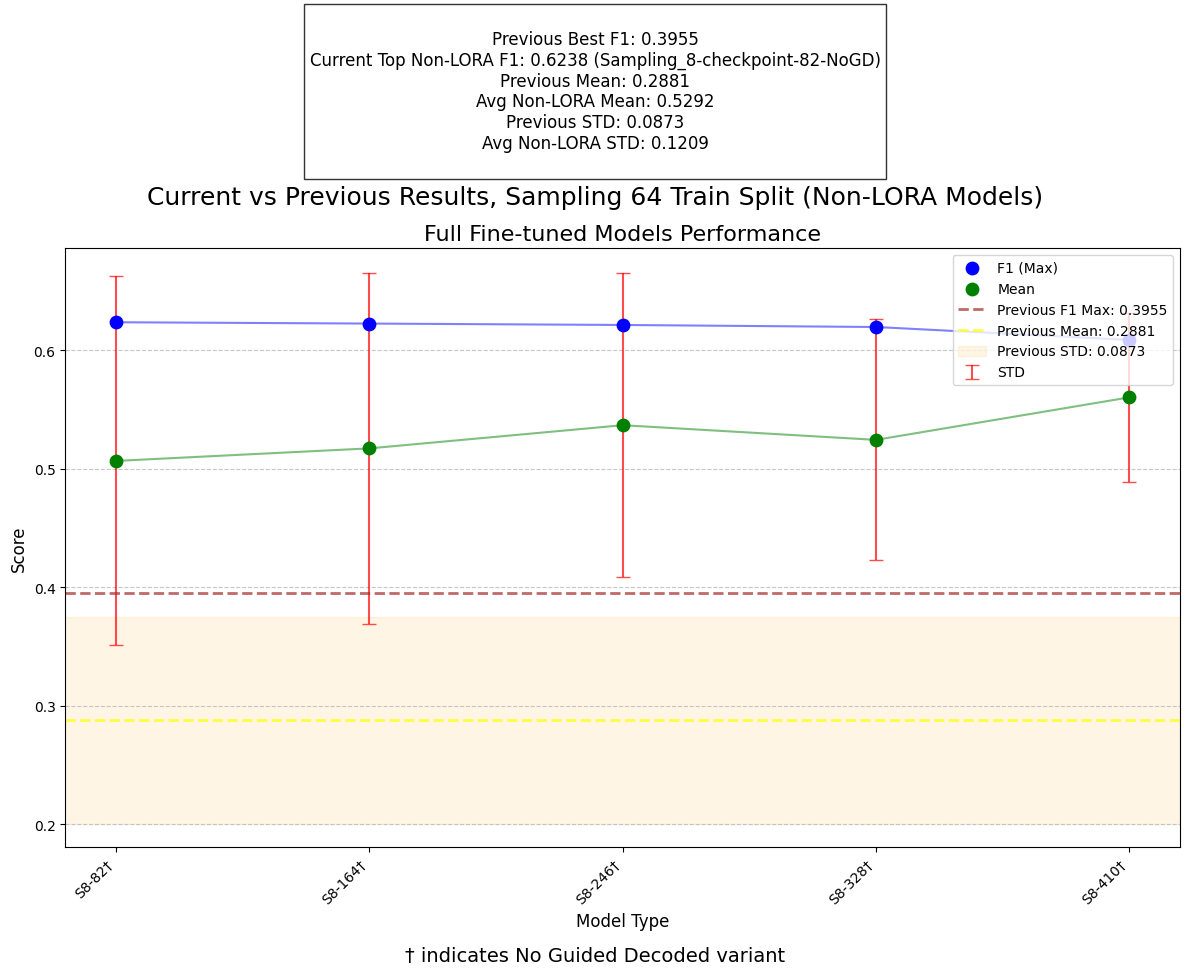

In [1]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/train/scores_iter4.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.3954556441866086
previous_std = 0.0873015145728405
previous_mean = 0.2880604592258623

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Train Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

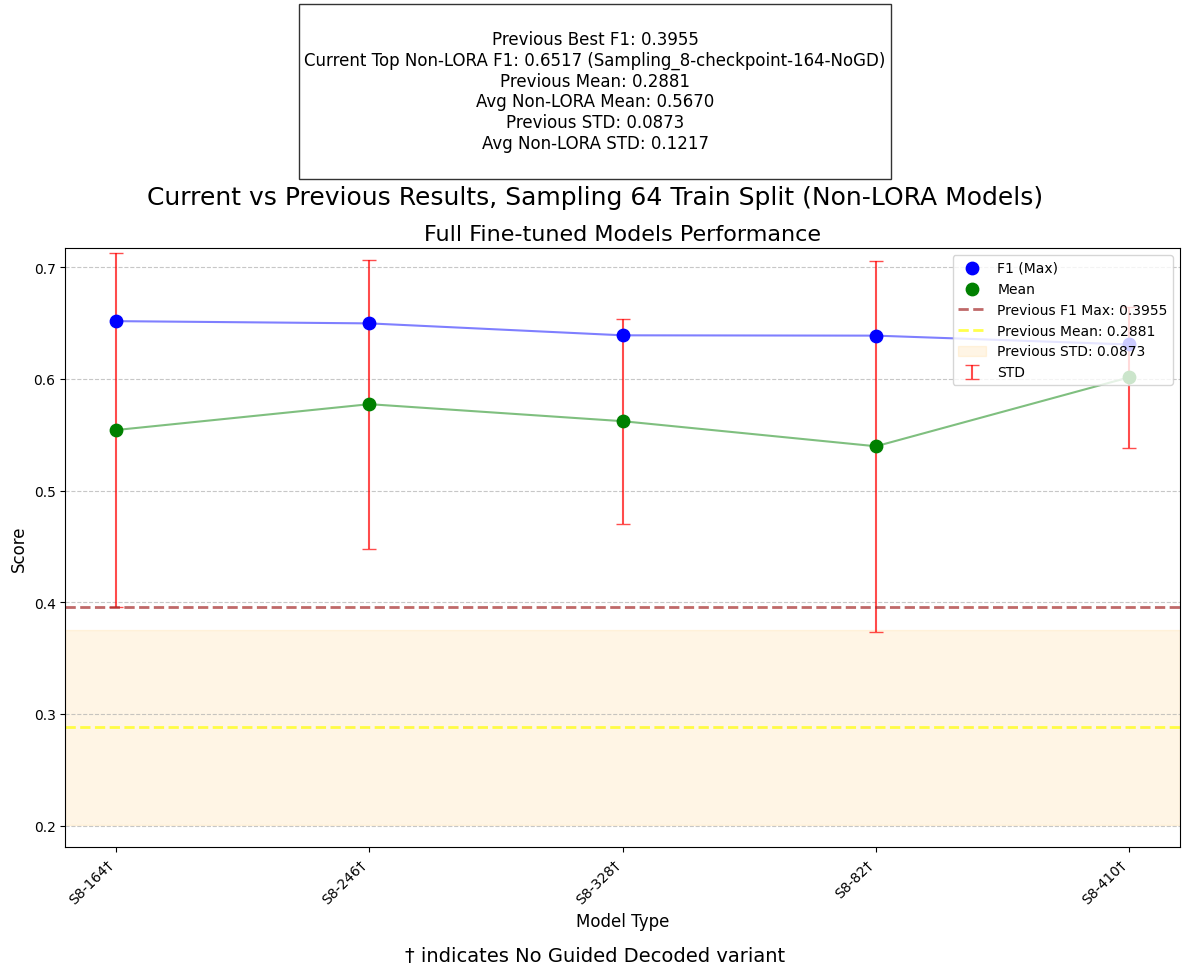

In [1]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/train/scores_iter5.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.3954556441866086
previous_std = 0.0873015145728405
previous_mean = 0.2880604592258623

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Train Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

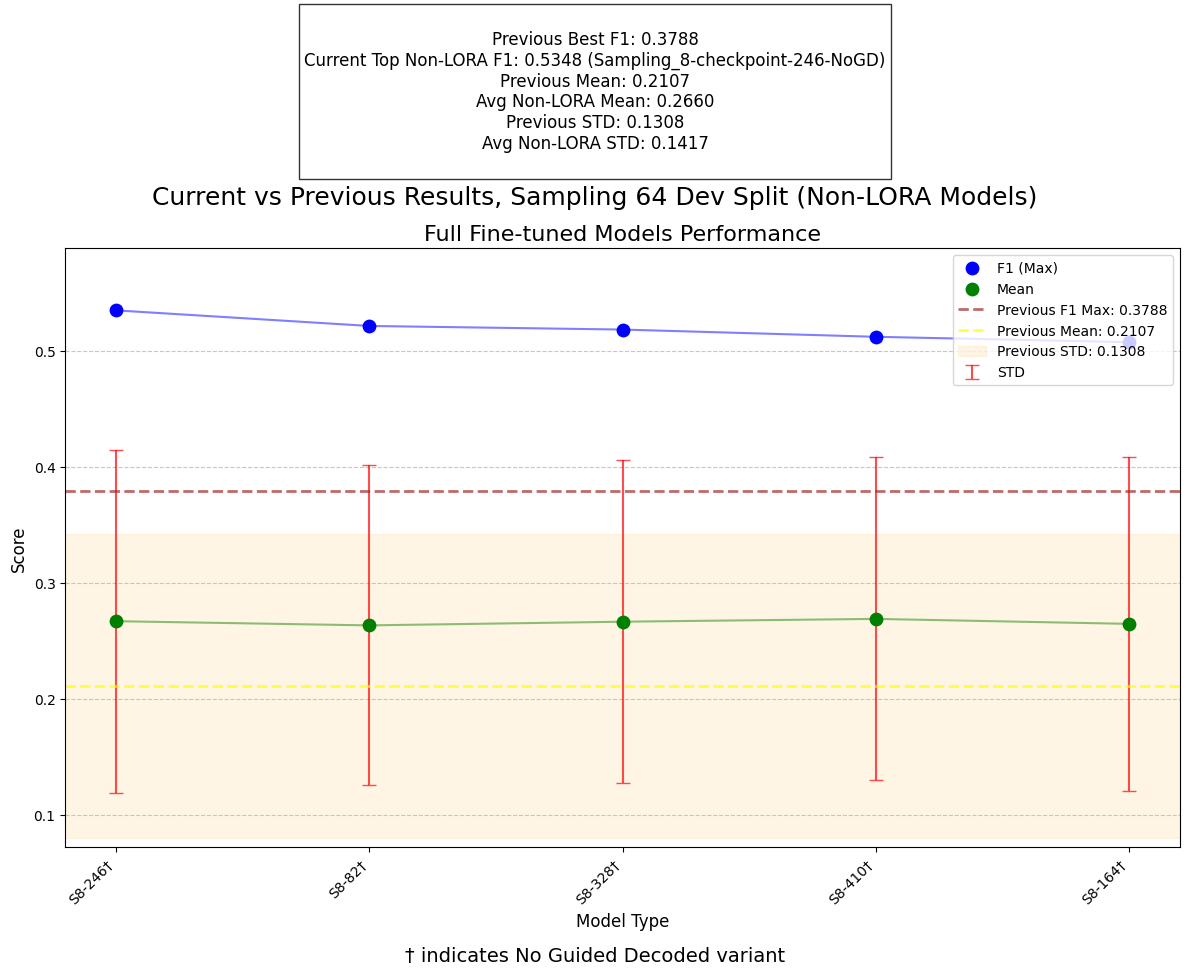

In [1]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/dev/scores_iter5.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.37882653061224486
previous_std = 0.13084442883022368
previous_mean = 0.21073892522867638

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Dev Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

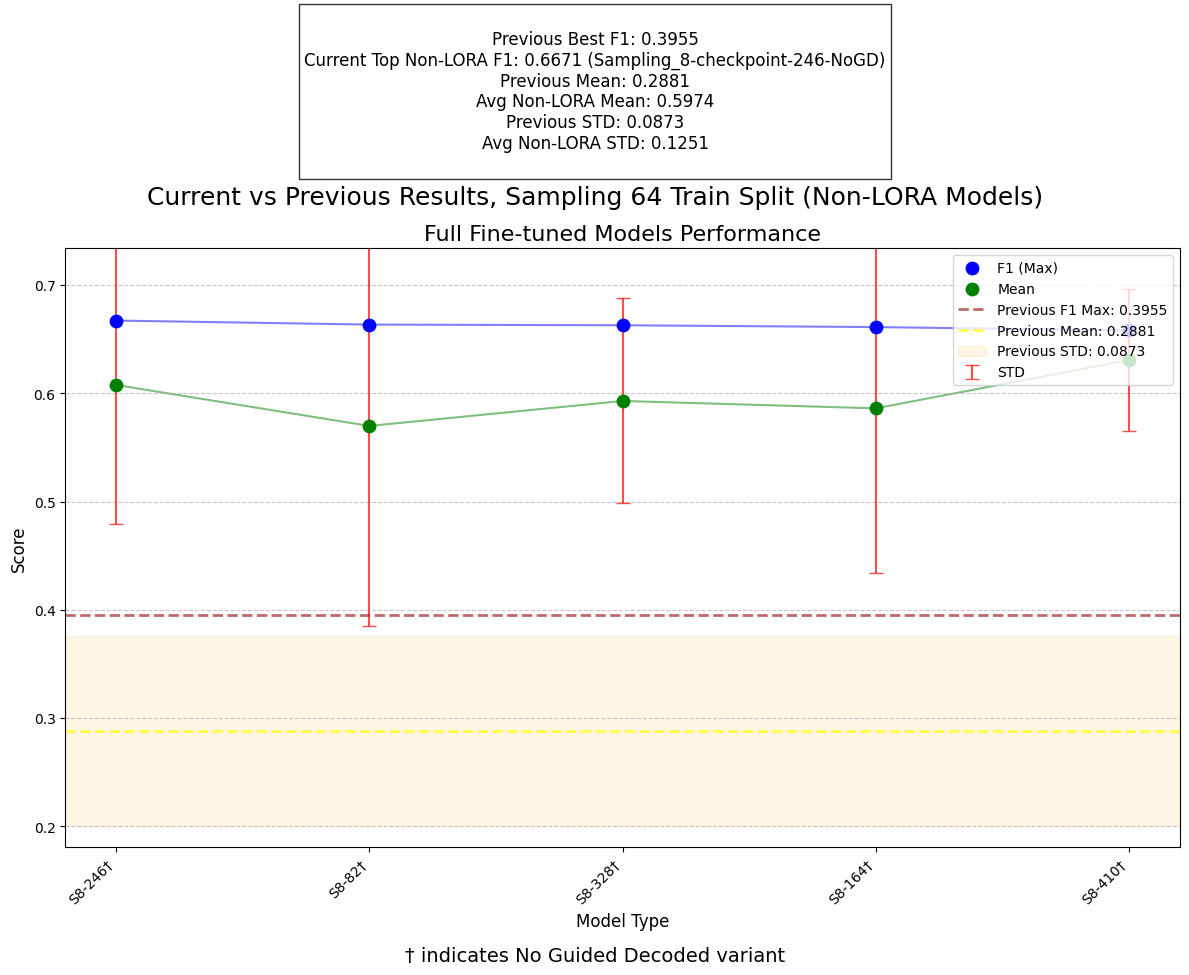

In [1]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/train/scores_iter6.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.3954556441866086
previous_std = 0.0873015145728405
previous_mean = 0.2880604592258623

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Train Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

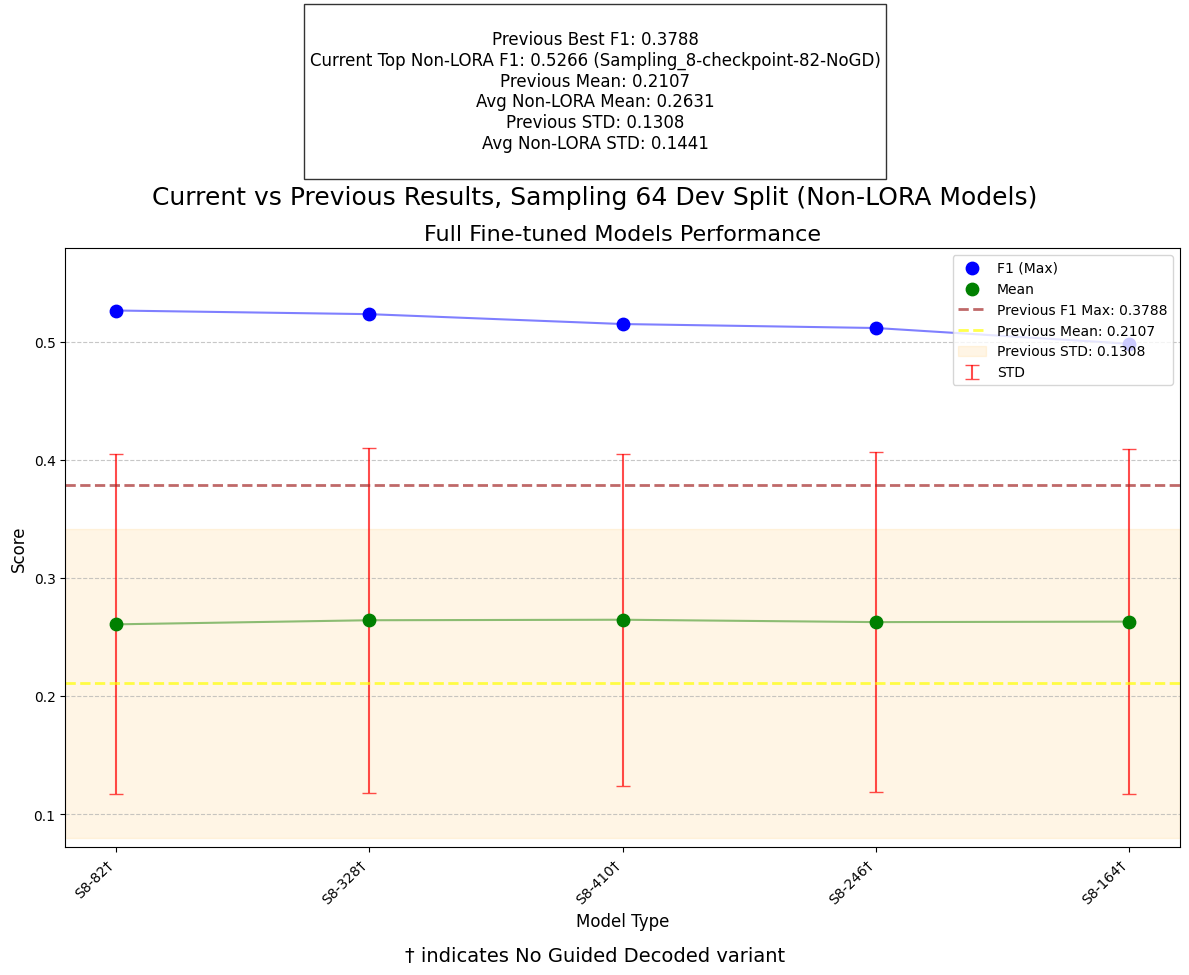

In [2]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/dev/scores_iter6.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.37882653061224486
previous_std = 0.13084442883022368
previous_mean = 0.21073892522867638

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Dev Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

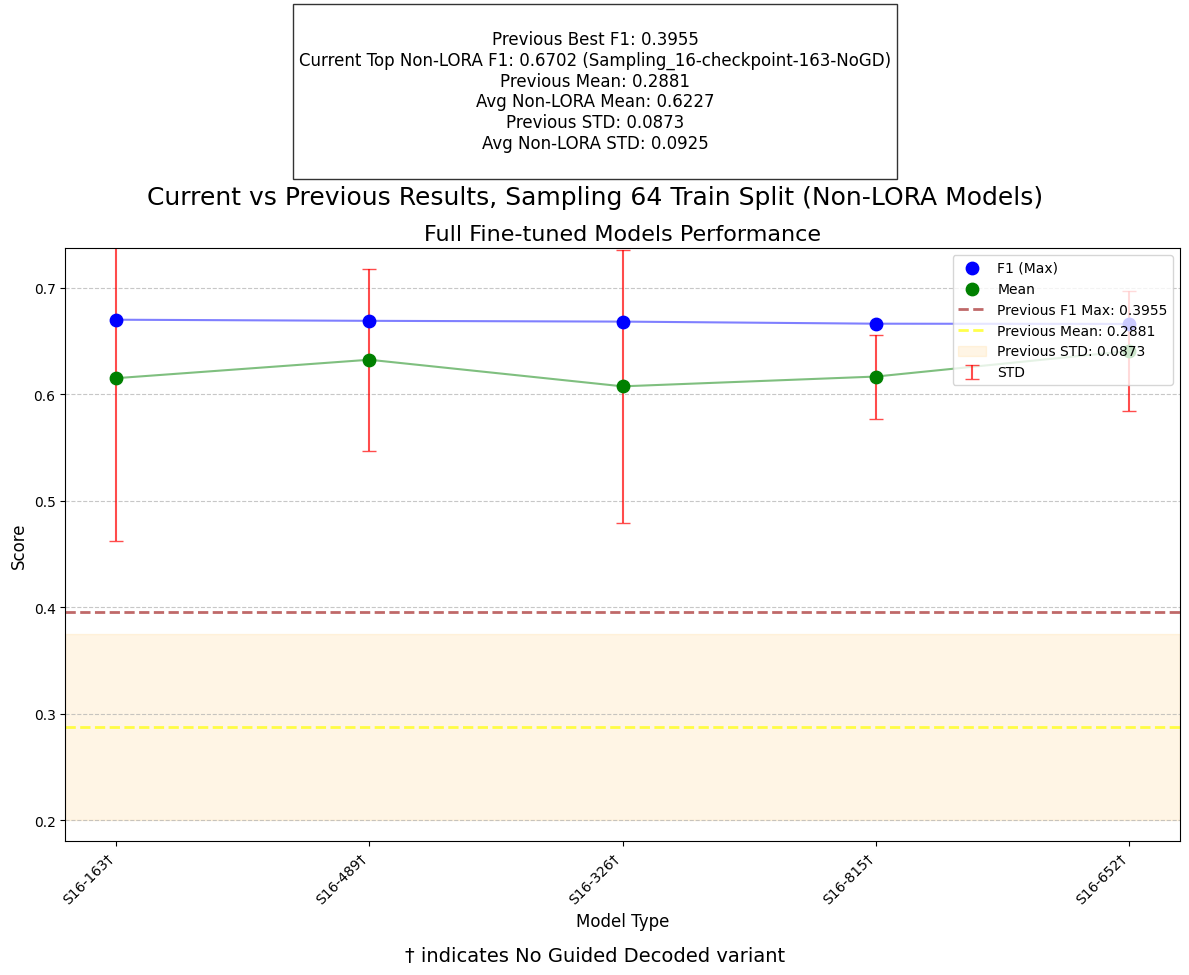

In [1]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/train/scores_iter7.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.3954556441866086
previous_std = 0.0873015145728405
previous_mean = 0.2880604592258623

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Train Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [ ]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os
#os.chdir("../../..")

# Read the CSV file
def read_csv_data():
    try:
        # Standard way to read CSV file
        df = pd.read_csv('rejectionSampling/dev/scores_iter6.csv')
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Function to determine if a row is LORA or not
def is_lora(row_name):
    return 'LORA' in row_name

df = read_csv_data()

# Previous results
previous_max_f1 = 0.37882653061224486
previous_std = 0.13084442883022368
previous_mean = 0.21073892522867638

# Filter out LORA models and sort by F1 score
df['is_lora'] = df['Type'].apply(is_lora)
non_lora_df = df[~df['is_lora']].sort_values('F1', ascending=False)

# Create figure with only one plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-LORA data
x_non_lora = np.arange(len(non_lora_df))

# Plot F1 and Mean as points instead of bars
ax.scatter(x_non_lora, non_lora_df['F1'], label='F1 (Max)', color='blue', s=80, zorder=3)
ax.scatter(x_non_lora, non_lora_df['Mean'], label='Mean', color='green', s=80, zorder=3)

# Add error bars for std centered on Mean points
ax.errorbar(x_non_lora, non_lora_df['Mean'], yerr=non_lora_df['STD'],
           fmt='none', ecolor='red', capsize=5, label='STD', alpha=0.7, zorder=2)

# Add connecting lines to make trends more visible
ax.plot(x_non_lora, non_lora_df['F1'], color='blue', alpha=0.5, linestyle='-', zorder=1)
ax.plot(x_non_lora, non_lora_df['Mean'], color='green', alpha=0.5, linestyle='-', zorder=1)

# Set labels and title for non-LORA plot
ax.set_xlabel('Model Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Full Fine-tuned Models Performance', fontsize=16)
ax.set_xticks(x_non_lora)

# Set y-axis limits
y_min = min(non_lora_df['Mean'].min() - non_lora_df['STD'].max(),
            previous_mean - previous_std) * 0.9
y_max = max(non_lora_df['F1'].max(), previous_max_f1) * 1.1
ax.set_ylim(y_min, y_max)

# Create shorter labels for better readability
non_lora_labels = []
for name in non_lora_df['Type']:
    # Check if NoGD is in the name
    if 'NoGD' in name:
        # Replace with S{number}-{checkpoint number}†
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)-NoGD', r'S\1-\2†', name)
    else:
        # Replace with S{number}-{checkpoint number}
        label = re.sub(r'Sampling_(\d+)-checkpoint-(\d+)', r'S\1-\2', name)
    non_lora_labels.append(label)

ax.set_xticklabels(non_lora_labels, rotation=45, ha='right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add previous results as horizontal lines and region
# Add horizontal line for previous max F1
ax.axhline(y=previous_max_f1, color='brown', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous F1 Max: {:.4f}'.format(previous_max_f1))

# Add horizontal line for previous mean
ax.axhline(y=previous_mean, color='yellow', linestyle='--', linewidth=2, alpha=0.7,
          label='Previous Mean: {:.4f}'.format(previous_mean))

# Add std range as a semi-transparent rectangle
std_rect = patches.Rectangle((ax.get_xlim()[0], previous_mean - previous_std),
                          ax.get_xlim()[1] - ax.get_xlim()[0],
                          2 * previous_std,
                          linewidth=1,
                          edgecolor='orange',
                          facecolor='orange',
                          alpha=0.1,
                          label='Previous STD: {:.4f}'.format(previous_std))
ax.add_patch(std_rect)

# Add a note explaining the † symbol
fig.text(0.5, 0.01, '† indicates No Guided Decoded variant', ha='center', fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Current vs Previous Results, Sampling 64 Dev Split (Non-LORA Models)', fontsize=18)

# Add summary statistics
stats_text = f"""
Previous Best F1: {previous_max_f1:.4f}
Current Top Non-LORA F1: {non_lora_df['F1'].max():.4f} ({non_lora_df.iloc[0]['Type']})
Previous Mean: {previous_mean:.4f}
Avg Non-LORA Mean: {non_lora_df['Mean'].mean():.4f}
Previous STD: {previous_std:.4f}
Avg Non-LORA STD: {non_lora_df['STD'].mean():.4f}
"""
fig.text(0.5, 1.0, stats_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

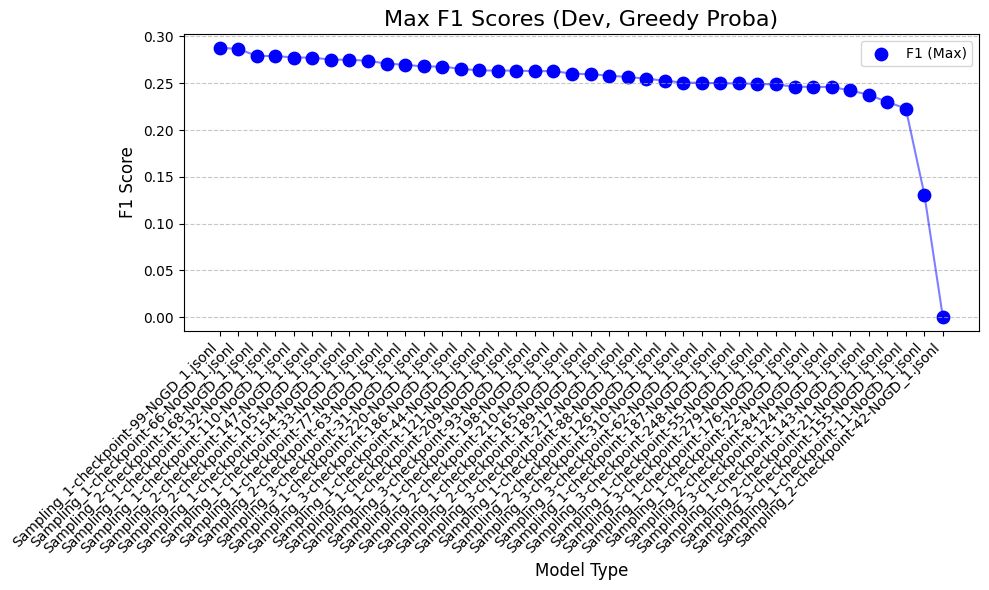

In [ ]:
from matplotlib import patches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import re
import os

def plot_max_f1_from_csv(csv_path, title="Max F1 Scores (Dev)", color='blue'):
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"Error reading file: {e}")
        return

    # Filter out LORA models if present
    if 'Type' in df.columns:
        df['is_lora'] = df['file'].apply(lambda x: 'LORA' in x)
        df = df[~df['is_lora']]

    # Sort by F1 score descending
    df = df.sort_values('f1', ascending=False)

    # Plot only the maximum F1 scores
    plt.figure(figsize=(10, 6))
    x_vals = np.arange(len(df))
    # Plot original F1
    plt.scatter(x_vals, df['f1'], color=color, s=80, label='F1 (Max)')
    plt.plot(x_vals, df['f1'], color=color, alpha=0.5, linestyle='-')
    
    # Plot all columns that match f1wX (where X is a number)
    f1w_cols = [col for col in df.columns if re.match(r'f1w\d+', col)]
    colors = plt.cm.tab10.colors
    for idx, col in enumerate(f1w_cols):
        plt.scatter(x_vals, df[col], color=colors[(idx+1) % len(colors)], s=60, label=col)
        plt.plot(x_vals, df[col], color=colors[(idx+1) % len(colors)], alpha=0.5, linestyle='--')
    plt.scatter(x_vals, df['f1'], color=color, s=80, label='F1 (Max)')
    plt.plot(x_vals, df['f1'], color=color, alpha=0.5, linestyle='-')

    # Set labels and title
    plt.xlabel('Model Type', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(x_vals, df['file'], rotation=45, ha='right', fontsize=10)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Usage
plot_max_f1_from_csv('rejectionSampling/dev/scores_greedy_proba_dev.csv', title="Max F1 Scores (Dev, Greedy Proba)")